In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 49
max_clusters = 15

# 1

In [2]:
fp = './datasets/exam_2021_01_15.csv'
df = pd.read_csv(fp)

In [3]:
Y = df['y']
X = df.drop('y', axis=1)

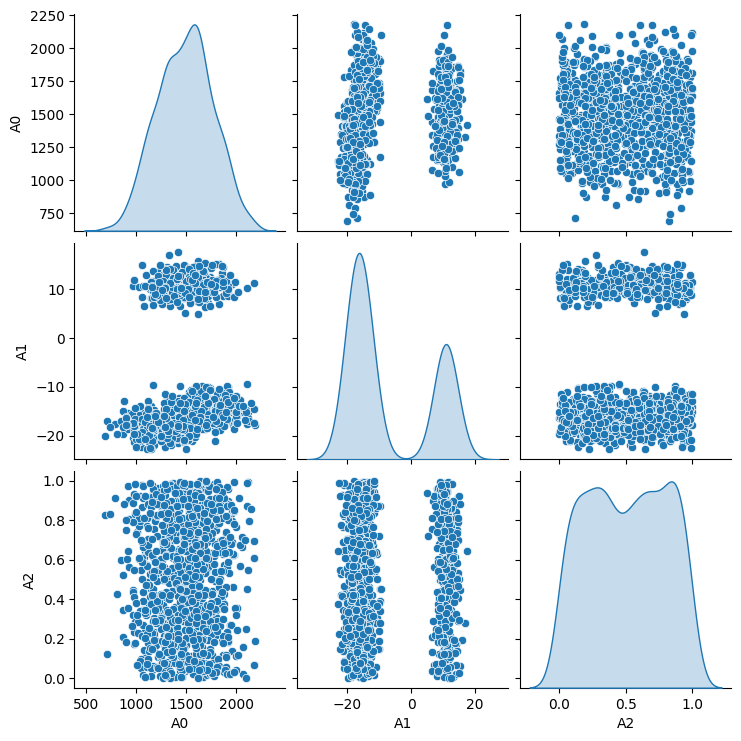

In [4]:
sns.pairplot(X, diag_kind='kde');
plt.show();

It seems that in relation with A1 there are 2 clusters

# 2

In [5]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
params = {'n_clusters': range(2, max_clusters + 1)}
grid = ParameterGrid(params)
pg = list(grid)
inertias = []
silhouettes = []
for p in pg:
    model = KMeans(**p, random_state=random_state)
    pred = model.fit_predict(X)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X, pred))

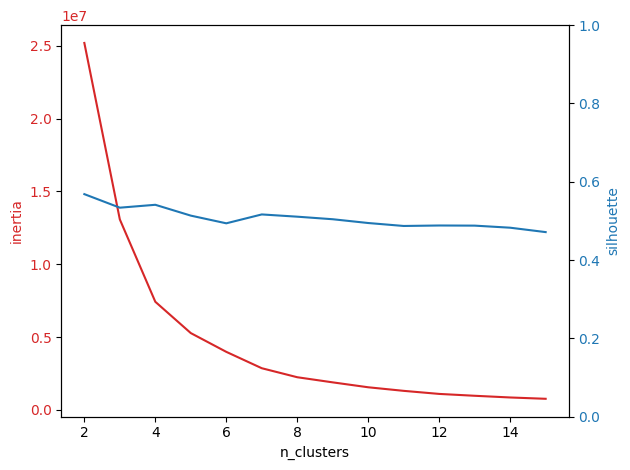

In [7]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia', color='tab:red')
ax1.plot(range(2, max_clusters + 1), inertias, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('silhouette', color='tab:blue')
ax2.plot(range(2, max_clusters + 1), silhouettes, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show();

As can be seen from the plot, the suggested number of clusters is 4. This is because with K=4 the silhouette is still high and the inertia is pretty low.
If we consider an higher number of cluster (such as 6) the inertia will decrease but the silhouette will decrease as well.

# 3

In [8]:
chosen_k = 4
model = KMeans(n_clusters=chosen_k, random_state=random_state)
y_km = model.fit_predict(X)
silhouette = silhouette_score(X, y_km)
print(f'Silhouette score: {silhouette:.3f}')

Silhouette score: 0.541


# 4

In [9]:
from sklearn.metrics import pair_confusion_matrix

cm = pair_confusion_matrix(Y, y_km)
ncm = cm / cm.sum()
print(ncm)
print(f'Accuracy: {ncm.diagonal().sum() * 100:.3f}')

[[0.52176977 0.14556356]
 [0.20831431 0.12435235]]
Accuracy: 64.612


# 5

Since the data distribution is very sparse, we can normalize the data using a scaler. This will improve the results

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_trf = pd.DataFrame(scaler.transform(X), columns=X.columns)

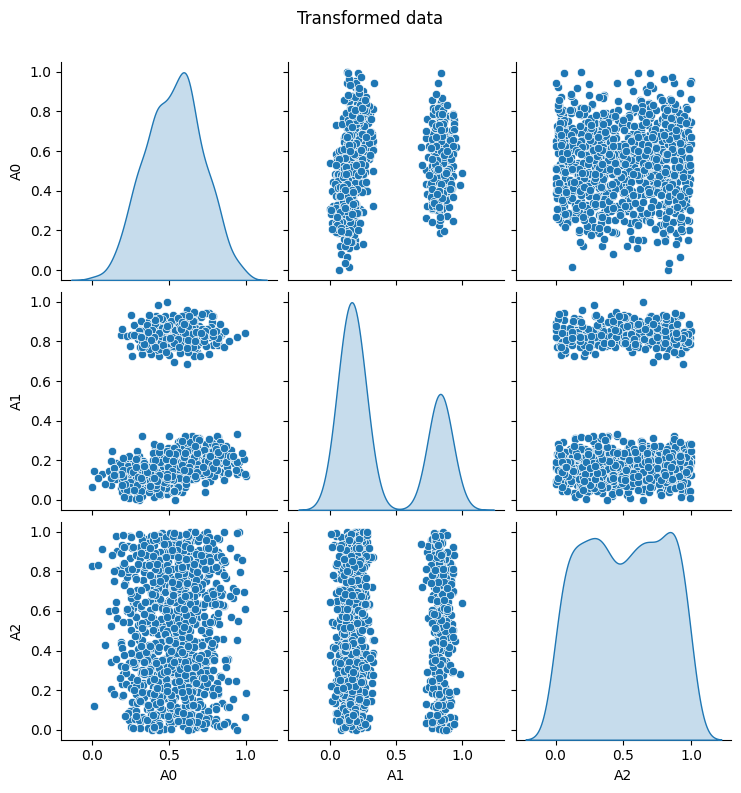

In [11]:
f = sns.pairplot(X_trf, diag_kind='kde')
f.fig.suptitle('Transformed data', y=1.05)
plt.show();

In [12]:
max_clusters_trf = max_clusters
params_trf = {"n_clusters": range(2, max_clusters_trf+1)}
pg_trf = list(ParameterGrid(params_trf))
inertias_trf = []
sils_trf = []
for i in range(len(pg_trf)):
    model_trf = KMeans(**(pg_trf[i]), random_state = random_state)
    pred_trf = model_trf.fit_predict(X_trf)
    inertias_trf.append(model_trf.inertia_)
    sils_trf.append(silhouette_score(X_trf, pred_trf))

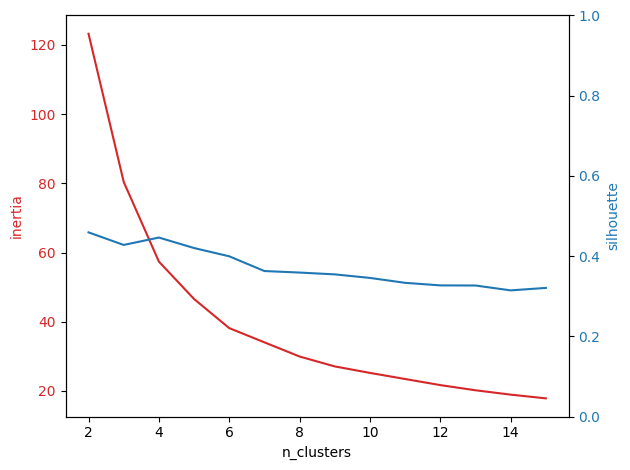

In [13]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia', color='tab:red')
ax1.plot(range(2, max_clusters + 1), inertias_trf, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('silhouette', color='tab:blue')
ax2.plot(range(2, max_clusters + 1), sils_trf, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show();

Also in this case we can choose K=4 for the same reason as above

In [17]:
chosen_k = 4
model_trf = KMeans(n_clusters=chosen_k, random_state=random_state)
y_km_trf = model_trf.fit_predict(X_trf)
silhouette_trf = silhouette_score(X_trf, y_km_trf)
print(f'Silhouette score: {silhouette_trf*100:.2f}%')
print(f'Silhouette is lower than before')

Silhouette score: 44.64%
Silhouette is lower than before


In [20]:
cm_trf = pair_confusion_matrix(Y, y_km_trf)
ncm_trf = cm_trf / cm_trf.sum()
print(ncm_trf)
print(f'Accuracy: {ncm_trf.diagonal().sum() * 100:.3f}')
print('Accuracy is higher than before')

[[0.55601802 0.11131532]
 [0.16536937 0.1672973 ]]
Accuracy: 72.332
Accuracy is higher than before
